**Symmetry intro for fitting routines for symmetry-based cases**

24/07/23

- Tidying up...
- Issues with formatting for lmfit params objects possibly solved with wrapper, but may still need HTML/PDF build fixes, TBC.
- Similarly, final section with manually-configured PD table layouts may need work, but probably OK.


22/04/23

See also:

- dev code http://jake:9966/lab/tree/QM3/doc-source/part2/sym-fitting_dev_130423.ipynb
- PEMtk docs http://jake:9966/lab/tree/QM3/doc-source/part2/working_with_symmetry_PEMtk_notes_180423-v210423_tidy.ipynb

TODO:

- General fitting introduction? Here or in "numerics" section.
- Some tidying of methods... for PD conversion already have `epsproc.classes._IO.matEtoPD()` as wrapper for main data structure, but not for symmetry class.
- Comparison with ePS matrix elements just dropped in from "working with symmetry" doc, may want to reduce/tidy a bit, maybe hide outputs.
- Fix numbering for sym defined case - currently it=0 for 1st case, doesn't match ePS 1-index.
- Output formatting for lmfit params objects, see https://github.com/phockett/Quantum-Metrology-with-Photoelectrons-Vol3/issues/9
- `hide-input` tag only works in HTML, for PDF case this just removes cell completely (input and output), so may need to address with `glue()` for basis set comparison tables at end. (See also )https://jupyterbook.org/en/stable/interactive/hiding.html)

ADD NOTE ON PHASE CONVENTIONS AND NUMERICAL ACCURACY/STABILITY here of in overview doc.

(sect:basis-sets:fitting-intro)=
# Basis sets for fitting

As outlined in Part I, particularly {numref}`Chpt. %s <chpt:theory>`, in order to compute and/or retrieve a set of matrix elements from experimental results, various physical properties of the system at hand are required. In particular, the symmetry of the system, the ionizing channel(s) of interest, and the properties of the ionizing radiation are all required to define the basis set used for {{ RADMATE }} retrieval via fitting ({numref}`Chpt. %s <chpt:numerical-details>`).

Numerically, there are two main methods to do this demonstrated herein:

1. The use of symmetry to define the basis set, in terms of symmetry-allowed components.
1. The use of _ab initio_ calculations to define the basis functions. In the work presented here, it is specifically {{ ePS_full }} matrix elements that are used, since these are also used to generate the synthetic data used to test the {{ BOOTSTRAP }}.

Manual creation of basis sets is also possible, and may be useful in some cases, particularly when exploring limiting cases.

## Symmetry-defined basis sets

As illustrated in {numref}`Sect. %s <sec:theory:symmetry-intro>`, a set of symmetry-allowed continuum functions can be determined, corresponding to a given ionizing transition and specific dipole symmetries. Such a basis set defines the allowed matrix elements in terms of a set of symmetrized harmonics, and these can be used as a basis for fitting with only minimal knowledge of the system required. 

The main advantage of a purely symmetry-defined approach is that no additional _ab initio_ computations are required, and that the resulting basis set is general. As discussed and illustrated in {numref}`Sect. %s <sec:tensor-formulation>`, the resulting {{ GAMMACHANNEL }} can also be used to guide analysis (and experiment if available prior to experimental work). The main disadvantage of such a blind approach is that initial data analysis may require significantly more effort than working from a computationally-defined basis, in particular the initial fitting space may be larger than required (leading to computationally more-demanding fitting runs), and testing for contributing/non-negligible terms by, e.g. using varying $l_{max}$, may be required in initial fitting runs. For further discussion, see {{ QM12 }}.

## Computationally-defined basis sets

In cases where photoionization calculations are available, the results can also be used to determine allowed basis components. Use of _ab initio_ computational results is, of course, useful for simulation as well as direct analysis, and may lead to a reduced basis set relative to the symmetry-defined case, since some components may be small and can be ignored. However, it does also require that substantial calculations are performed (or results are available, e.g. from {{ ePSdata_docs }}), and - potentially - may bias the matrix element analysis/retrieval in cases where the experimental results and computational results are significantly different.

## Basis creation worked examples

In the following chapters basis functions are created for each case at hand, typically starting from _ab initio_ computational results (since these are required to simulate the sample data). Here a more detailed worked example is given to illustrate the basic methodology behind the assignments, the differences between the approaches, and highlight some issues of convention which may arise.

### Simple case: $N_2~3\sigma_g^{-1}$ ionization

% Include char table here? UPDATE: now in note.

As a simple example, consider the case of a homonuclear diatomic ($D_{\infty h}$ {{ PG }}, cylindrically symmetric), and a totally symmetric case, e.g. the ionization of the $\Sigma_{g}^{+}$ {{ HOMO }} of $N_2$. For this example, 

- $\Gamma^{i} = \Gamma^{+} = \Gamma^{s} = \Sigma_{g}^{+}$. Note that, for single-electron ionization from a fully-occupied valence orbitals, the ion symmetry will correspond to the hole symmetry, hence the symmetry of the ionized orbital. This simple picture may break down for more complicated cases, e.g. if multi-electron effects or substantial nuclear motions are involved; for radical systems the overall symmetry of all partially-occupied orbitals must be accounted for.
- The dipole symmetries correspond to the Cartesian axes/translations given in the character tables, hence $\Sigma_{u}^{+} = (z)$ and $\Pi_{u} = (x,y)$ for $D_{\infty h}$. Note that, in this cylindrically symmetric case, the Cartesian $(x,y)$ components are spanned by the doubly-degenerate $\Pi_{u}$ irreducible representation - physically this corresponds to the arbitrary orientation of these axes in the {{ MF }} (i.e. no preferred direction is defined).

Following Eq. {eq}`eq:ionization-symm-electronic`, the allowed components (irreducible representations) can be determined by hand making use of character and direct product tables, and substituting in for the terms defined above:

\begin{eqnarray}
\Gamma^{+}\otimes\Gamma^{e}\otimes\Gamma_{\mathrm{dipole}}\otimes\Gamma^{i} & \supseteq & \Sigma_{g}^{+}\\
\Sigma_{g}^{+}\otimes\Gamma^{e}\otimes\begin{array}{c}
\Pi_{u}~(x,y)\\
\Sigma_{u}^{+}~(z)
\end{array}\otimes\Sigma_{g}^{+} & \supseteq & \Sigma_{g}^{+}\\
\Sigma_{g}^{+}\otimes\Gamma^{e}\otimes\begin{array}{c}
\Pi_{u}~(x,y)\\
\Sigma_{u}^{+}~(z)
\end{array} & \supseteq & \Sigma_{g}^{+}\\
\Gamma^{e}\otimes\begin{array}{c}
\Pi_{u}~(x,y)\\
\Sigma_{u}^{+}~(z)
\end{array} & \supseteq & \Sigma_{g}^{+}
\end{eqnarray}

```{admonition} Group theory character tables and related
Character tables, direct product tables and related information can be found at various sources online, or in textbooks, e.g. Refs. {cite}`Atkins2006, gelessusCharacterTablesChemically, katzerCharacterTablesPoint`. For $D_{\infty h}$ the pages at [symmetry.jacobs-university.de](http://symmetry.jacobs-university.de/cgi-bin/group.cgi?group=1001&option=4) provide a good quick reference; for extended tables [including spherical harmonic symmetries and direct products the pages from G. Katzers are useful](http://www.gernot-katzers-spice-pages.com/character_tables/index.html).
```

Hence the allowed continuum components are given by:

\begin{equation}
\Gamma^{e}=\begin{array}{c}
\Pi_{u}~(x,y)\\
\Sigma_{u}^{+}~(z)
\end{array}
\end{equation}

As indicated above, this case is split by symmetry into a "parallel" and "perpendicular" continua, accessed by the $z$ or $(x,y)$ dipole components in the {{ MF }} respectively; these are often denote generically by appending $\perp$ and $\parallel$ symbols to derived quantities, e.g. $\sigma_{\parallel}$ for the corresponding cross-section. In the {{ LF }} or {{ AF }} these continua can be mixed according to the polarization state and geometry of the ionizing radiation, and the molecular alignment ({{ ADMs }}).

The total scattering state symmetry is often also used to label continuum states, and is given by $\Gamma_{\mathrm{scat}}=\Gamma^{+}\otimes\Gamma^{e}$:

\begin{equation}
\Gamma_{\mathrm{scat}}=\Sigma_{g}^{+}\otimes\begin{array}{c}
\Pi_{u}~(x,y)\\
\Sigma_{u}^{+}~(z)
\end{array}=\begin{array}{c}
\Pi_{u}~(x,y)\\
\Sigma_{u}^{+}~(z)
\end{array}
\end{equation}

This is identical to $\Gamma^{e}$ in this simple case.

### Degenerate case example: $N_2~3\pi_u^{-1}$ ionization

For more complicated cases, multiple symmetry components may be found. For example, the ionization from a $\Pi_u$ orbital, e.g. $N_2$ {{ HOMO }}-1.

In this case, $\Gamma^{+} = \Pi_u$, and - working through the direct products as above - yields the allowed continuum components:

\begin{equation}
\Gamma^{e}=\begin{array}{c}
\Sigma_{g}^{+} + \Delta_{g}~(x,y)\\
\Pi_{g}~(z)
\end{array}
\end{equation}

And total scattering state symmetries:

\begin{equation}
\Gamma_{\mathrm{scat}}=\Pi_{u}\otimes\begin{array}{c}
\Sigma_{g}^{+} + \Delta_{g}~(x,y)\\
\Pi_{g}~(z)
\end{array}=\begin{array}{c}
\Pi_{u} + \Delta_{u} + \Phi_{u}~(x,y)\\
\Sigma_{u}^{+} + \Sigma_{u}^{-} + \Delta_{u}~(z)
\end{array}
\end{equation}

In this case, the direct product results give multiple components for each continua. However, since the continuum wavefunction is already defined for multiple components, as given by $\Gamma^{e}$, only the first $\Gamma_{\mathrm{scat}}$ symmetry is required as a unique label here. In this case, therefore, $\Gamma_{\mathrm{scat}} = \Pi_{u}~(x,y)$ and $\Gamma_{\mathrm{scat}} =\Sigma_{u}^{+}~(z)$ suffice to label the total scattering states.

### Defining symmetrized harmonics

In the examples above, the allowed irreducible representations are defined by hand from direct product tables for illustrative purposes. But, in general, it is tedious to categorize/define the allow spherical harmonics and linear combinations. With the {{ PEMtk_repo }}, both the direct products illustrated above, and the determination of associated spherical harmonics, can be automated and the full basis set rapidly defined numerically. This was illustrated briefly in {numref}`Sect. %s <sec:theory:symmetry-intro>`, and is extended here for the example cases above.

````{margin}
```{note}

Full tabulations of the parameters available in HTML or notebook formats only.

```
````

Computationally, the cylindrically-symmetric $\infty$ groups can be approximated by a high-order group, e.g. $D_{\infty h} \approx D_{10h}$. (For a cross-check, see the [full tables and direct products online](http://www.gernot-katzers-spice-pages.com/character_tables/D10h.html).)  Here the notational convention is $A1 = \Sigma^{+}$, $A2 = \Sigma^{-}$, $E1 = \Pi$, $E2 = \Delta$ and so forth (see the [$D_{\infty h}$ character table](http://symmetry.jacobs-university.de/cgi-bin/group.cgi?group=1001&option=4) for more details).

In [1]:
# Run default config - may need to set full path here
%run '../scripts/setup_notebook.py'

# Override plotters backend?
# plotBackend = 'pl'

*** Setting up notebook with standard Quantum Metrology Vol. 3 imports...
For more details see https://pemtk.readthedocs.io/en/latest/fitting/PEMtk_fitting_basic_demo_030621-full.html
To use local source code, pass the parent path to this script at run time, e.g. "setup_fit_demo ~/github"

*** Running: 2023-07-26 16:06:18
Working dir: /home/jovyan/QM3/doc-source/part2
Build env: notebook

* Loading packages...


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 


* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.


* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 


* Set Holoviews with bokeh.
Jupyter Book      : 0.15.1
External ToC      : 0.3.1
MyST-Parser       : 0.18.1
MyST-NB           : 0.17.2
Sphinx Book Theme : 1.0.1
Jupyter-Cache     : 0.6.1
NbClient          : 0.7.4


In [2]:
# Example following symmetrized harmonics demo

# Import class
from pemtk.sym.symHarm import symHarm

# Compute hamronics for D10h, lmax=4
sym = 'D10h'
lmax=4

symObjA1g = symHarm(sym,lmax)

# Allowed terms and mappings are given in 'dipoleSyms'
# symObj.dipole['dipoleSyms']

*** Mapping coeffs to ePSproc dataType = matE
Remapped dims: {'C': 'Cont', 'mu': 'it'}
Added dim Eke
Added dim Targ
Added dim Total
Added dim mu
Added dim Type
Found dipole symmetries: 
{'A2u': {'m': [0], 'pol': ['z']}, 'E1u': {'m': [-1, 1, -1, 1], 'pol': ['x', 'y']}}


/home/jovyan/github/PEMtk/pemtk/sym/_dipoleTerms.py:102: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (col, vals) in dipolePD.iteritems():


In [3]:
# Setting the symmetry for the neutral and ion allows direct products to be computed, 
# and allowed terms to be determined.

sNeutral = 'A1g'
sIonSG = 'A1g'

symObjA1g.directProductContinuum([sNeutral, sIonSG])

# Results are pushed to self.continuum, in dictionary and Pandas DataFrame formats, 
# and can be manipulated using standard functionality.
# The subset of allowed values are also set to a separate DataFrame and list.

# Glue figure for later - real part only in this case
# Also clean up axis labels from default state labels ('LM' and 'LM_p' in this case).
glue("dipoleTermsD10hA1g", symObjA1g.continuum['allowed']['PD'])

,,allowed,m,pol,result,terms
Dipole,Target,,,,,
A2u,A2u,True,[0],[z],[A1g],"[A1g, A1g]"
E1u,E1u,True,"[-1, 1, -1, 1]","[x, y]","[A1g, A2g, E2g]","[A1g, A1g]"


```{glue:figure} dipoleTermsD10hA1g
---
name: "fig-dipoleTermsD10hA1g"
---
Dipole-allowed continuum symmetries ("Target") for $D_{10h}$, $A_{1g}$ ionization.
```

In [4]:
# Setting the symmetry for the neutral and ion allows direct products to be computed, 
# and allowed terms to be determined.

sNeutral = 'A1g'
sIonPU = 'E1u'

# Define new object for E1u case
symObjE1u = symHarm(sym,lmax)
symObjE1u.directProductContinuum([sNeutral, sIonPU])

# Results are pushed to self.continuum, in dictionary and Pandas DataFrame formats, 
# and can be manipulated using standard functionality.
# The subset of allowed values are also set to a separate DataFrame and list.

# Glue table for later
glue("dipoleTermsD10hE1u", symObjE1u.continuum['allowed']['PD'])

*** Mapping coeffs to ePSproc dataType = matE
Remapped dims: {'C': 'Cont', 'mu': 'it'}
Added dim Eke
Added dim Targ
Added dim Total
Added dim mu
Added dim Type
Found dipole symmetries: 
{'A2u': {'m': [0], 'pol': ['z']}, 'E1u': {'m': [-1, 1, -1, 1], 'pol': ['x', 'y']}}


/home/jovyan/github/PEMtk/pemtk/sym/_dipoleTerms.py:102: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (col, vals) in dipolePD.iteritems():


allowed               m     pol                result  \
Dipole Target                                                         
A2u    E1g       True             [0]     [z]       [A1g, A2g, E2g]   
E1u    A1g       True  [-1, 1, -1, 1]  [x, y]       [A1g, A2g, E2g]   
       A2g       True  [-1, 1, -1, 1]  [x, y]       [A1g, A2g, E2g]   
       E2g       True  [-1, 1, -1, 1]  [x, y]  [A1g, A2g, E2g, E4g]   

                    terms  
Dipole Target              
A2u    E1g     [A1g, E1u]  
E1u    A1g     [A1g, E1u]  
       A2g     [A1g, E1u]  
       E2g     [A1g, E1u]

```{glue:figure} dipoleTermsD10hE1u
---
name: "fig-dipoleTermsD10hE1u"
---
Dipole-allowed continuum symmetries ("Target") for $D_{10h}$, $E_{1u}$ ionization.
```

The allowed terms can be further expressed in terms of the spherical harmonic components.

In [5]:
# Basis table with the Character values limited to those defined in 
# self.continuum['allowed']['PD'] Target column
symObjE1u.displayXlm(symFilter = True, YlmType='comp') 

# Glue table for later
glue("dipoleTermsD10hBasis", symObjE1u.displayXlm(symFilter = True, 
                                                  YlmType='comp', returnPD=True))

b    \
l                                                   0 1   
Character ($\Gamma$) SALC (h) PFIX ($\mu$) m              
A1g                  0        0             0  (1+0j)     
                     1        0             0             
                     2        0             0             
E1g                  0        0            -1             
                                            1             
                              1            -1             
                                            1             
                     1        0            -1             
                                            1             
                              1            -1             
                                            1             
E2g                  0        0            -2             
                                            2             
                              1            -2             
                                            2             
                     1        0            -2             
                                            2             
                              1            -2             
                                            2             

                                                                           \
l                                                                     2 3   
Character ($\Gamma$) SALC (h) PFIX ($\mu$) m                                
A1g                  0        0             0                               
                     1        0             0                    (1+0j)     
                     2        0             0                               
E1g                  0        0            -1   (0.7071067811865475+0j)     
                                            1   (0.7071067811865475-0j)     
                              1            -1  (-0.7071067811865475-0j)     
                                            1   (0.7071067811865475-0j)     
                     1        0            -1                               
                                            1                               
                              1            -1                               
                                            1                               
E2g                  0        0            -2   (0.7071067811865475+0j)     
                                            2   (0.7071067811865475+0j)     
                              1            -2  (-0.7071067811865475+0j)     
                                            2   (0.7071067811865475+0j)     
                     1        0            -2                               
                                            2                               
                              1            -2                               
                                            2                               

                                                                         
l                                                                     4  
Character ($\Gamma$) SALC (h) PFIX ($\mu$) m                             
A1g                  0        0             0                            
                     1        0             0                            
                     2        0             0                    (1+0j)  
E1g                  0        0            -1                            
                                            1                            
                              1            -1                            
                                            1                            
                     1        0            -1   (0.7071067811865475+0j)  
                                            1   (0.7071067811865475-0j)  
                              1            -1  (-0.7071067811865475-0j)  
                                            1   (0.7071067811865475-0j)  
E2g                  0

b    \
l                                                   0 1   
Character ($\Gamma$) SALC (h) PFIX ($\mu$) m              
A1g                  0        0             0  (1+0j)     
                     1        0             0             
                     2        0             0             
E1g                  0        0            -1             
                                            1             
                              1            -1             
                                            1             
                     1        0            -1             
                                            1             
                              1            -1             
                                            1             
E2g                  0        0            -2             
                                            2             
                              1            -2             
                                            2             
                     1        0            -2             
                                            2             
                              1            -2             
                                            2             

                                                                           \
l                                                                     2 3   
Character ($\Gamma$) SALC (h) PFIX ($\mu$) m                                
A1g                  0        0             0                               
                     1        0             0                    (1+0j)     
                     2        0             0                               
E1g                  0        0            -1   (0.7071067811865475+0j)     
                                            1   (0.7071067811865475-0j)     
                              1            -1  (-0.7071067811865475-0j)     
                                            1   (0.7071067811865475-0j)     
                     1        0            -1                               
                                            1                               
                              1            -1                               
                                            1                               
E2g                  0        0            -2   (0.7071067811865475+0j)     
                                            2   (0.7071067811865475+0j)     
                              1            -2  (-0.7071067811865475+0j)     
                                            2   (0.7071067811865475+0j)     
                     1        0            -2                               
                                            2                               
                              1            -2                               
                                            2                               

                                                                         
l                                                                     4  
Character ($\Gamma$) SALC (h) PFIX ($\mu$) m                             
A1g                  0        0             0                            
                     1        0             0                            
                     2        0             0                    (1+0j)  
E1g                  0        0            -1                            
                                            1                            
                              1            -1                            
                                            1                            
                     1        0            -1   (0.7071067811865475+0j)  
                                            1   (0.7071067811865475-0j)  
                              1            -1  (-0.7071067811865475-0j)  
                                            1   (0.7071067811865475-0j)  
E2g                  0

```{glue:figure} dipoleTermsD10hBasis
---
name: "fig-dipoleTermsD10hBasis"
---
Dipole-allowed basis set for $D_{10h}$, $E_{1u}$ ionization.
```

(sec:basis-sets:mapping-params)=
### Mapping symmetrized harmonics to fit parameters

The final preparatory steps for tackling a specific retrieval problem is to map the allowed channels to photoionization matrix elements - including the assignment of any missing terms - and from these to fitting paramters. The matrix elements are currently defined in the {{ PEMtk_repo }} and the {{ ePSproc_full }} following the definitions in {{ ePS_full }}, and the symmetry-defined cases can be remapped to this format. (Further information can be found in the {{ PEMtk_docs }}.) For a comparison with _ab initio_ matrix elements, see {numref}`Sect. %s <sec:basis-sets:comparison-with-abinitio>`.

1. For symmetry-defined basis sets, these must first be mapped to an ePSproc data structure, although this step is not necessary when working from _ab initio_ basis sets. This is explored in {numref}`Sect. %s <sec:basis-sets:remapping-to-ePS>`.
1. From a given basis set, the parameters used for fitting data are determined. This converts the parameters to {{ lmfit }} objects in magnitude-phase form, and (optionally) sets various symmetry relations and constraints. This is explored in {numref}`Sect. %s <sec:basis-sets:remapping-to-fittingParams>`.

Further examples can be found in the remainder of this text, and also in the {{ PEMtk_docs }}.

(sec:basis-sets:remapping-to-ePS)=
#### Remapping to ePolyScat definitions

In the remapping, the code attempts to assign all the symmetries matching ePolyScat definitions from the direct products.

The terms are:

1. `Cont` is the continuum (free electron) symmetry, $\Gamma^{e}$.
1. `Targ` is the target state symmetry, $\Gamma^{+}$.
1. `Total` is the overall symmetry of the scattering state, $\Gamma_{\mathrm{scat}}=\Gamma^{+}\otimes\Gamma^{e}$.

Additionally, the current default remapping changes some of the terms defined by the symmetrized harmonics routines and conventions:

- Symmetry `C` > `Cont` (continuum symmetry label in ePSproc)
- Index `h` > `it` (degeneracy index in ePSproc)
- Index `mu` > `muX` (to avoid confusion with photon index `mu` in ePSproc)

Note, in particular, that $\mu$ is - unfortunately - the photon polarization term in the conventional photoionization equations, but also used in the standard definition of the symmetrized harmonics as a degeneracy index. In some cases, the symmetrization indicies $\mu$ or $h$ may be redundant, and can be dropped or summed over, but care must be taken here to avoid breaking the symmetry of the simplified basis set. 

Finally, the remapping adds additional labels used by {{ ePS_full }}, but which are not necessarily required in general:

- `Type`: for ePolyScat results, this labels length or velocity gauge results; this is assigned as `U` (unassigned) in the conversion.
- `Eke`: the photoelectron kinetic energy, for the basis states this is just set to 0.
- `mu`: this is set to NaN by the main routine; if the ionizing channel symmetries are defined these values (the photon polarization) can be determined from the dipole-allowed terms, and this is done by the `assignSymMuTerms()` method, as illustrated below.

In [6]:
# Run conversion with a different dimMap & dataType - note this includes all symmetries, 
# and both real and complex harmonic basis sets
dataType = 'matE'

# With custom dim mapping (optional)...
dimMap = {'C':'Cont', 'mu':'it'}   # Default dimMap = {'C':'Cont','h':'it', 'mu':'muX'}  
# dimMap = {'C':'Cont','h':'it', 'mu':'muX'}  # Default case

# Map to ePSproc definitions
symObjA1g.toePSproc(dataType=dataType, dimMap=dimMap)

# To assign specific terms, use self.assignMissingSym
# Note this can take a single value, or a list which must match the size of the 
# Sym multiindex defined in the Xarray dataset.
symObjA1g.assignMissingSym('Targ', sIonSG)

# To define terms from produts, use self.assignMissingSymProd
symObjA1g.assignMissingSymProd()

# To attempt to assign mu values (by symmetry), use self.assignSymMuTerms()
symObjA1g.assignSymMuTerms()

# Show Pandas table of results
symObjA1g.coeffs['symAllowed']['PD'].fillna('')

*** Mapping coeffs to ePSproc dataType = matE
Remapped dims: {'C': 'Cont', 'mu': 'it'}
Added dim Eke
Added dim Targ
Added dim Total
Added dim mu
Added dim Type
*** Updated self.coeffs['matE'] with new coords.
Assigned 'Total' from A1g x A1g = ['A1g']
Assigned 'Total' from A1g x A2u = ['A2u']
Assigned 'Total' from A1g x E1g = ['E1g']
Assigned 'Total' from A1g x E1u = ['E1u']
Assigned 'Total' from A1g x E2g = ['E2g']
Assigned 'Total' from A1g x E2u = ['E2u']
Assigned 'Total' from A1g x E3g = ['E3g']
Assigned 'Total' from A1g x E3u = ['E3u']
Assigned 'Total' from A1g x E4g = ['E4g']
*** Updated self.coeffs['matE'] with new coords.
Assigned dipole-allowed terms for dim = 'Cont' to self.coeffs['symAllowed']


Cont                                 A2u                       E1u
Eke Targ Total Type h it l m  mu                                  
0   A1g  A2u   U    0 0  1  0  0  (1+0j)                          
                    1 0  3  0  0  (1+0j)                          
         E1u   U    0 0  1 -1 -1           (0.7071067811865475+0j)
                               1           (0.7071067811865475+0j)
                            1 -1          (-0.7071067811865475-0j)
                               1          (-0.7071067811865475-0j)
                      1  1 -1 -1          (-0.7071067811865475+0j)
                               1          (-0.7071067811865475+0j)
                            1 -1          (-0.7071067811865475-0j)
                               1          (-0.7071067811865475-0j)
                    1 0  3 -1 -1           (0.7071067811865475+0j)
                               1           (0.7071067811865475+0j)
                            1 -1          (-0.7071067811865475-0j)
                               1          (-0.7071067811865475-0j)
                      1  3 -1 -1          (-0.7071067811865475+0j)
                               1          (-0.7071067811865475+0j)
                            1 -1          (-0.7071067811865475-0j)
                               1          (-0.7071067811865475-0j)

Set dataType (No dataType)
Set dataType (No dataType)
Plotting data (No filename), pType=a, thres=0.01, with Seaborn


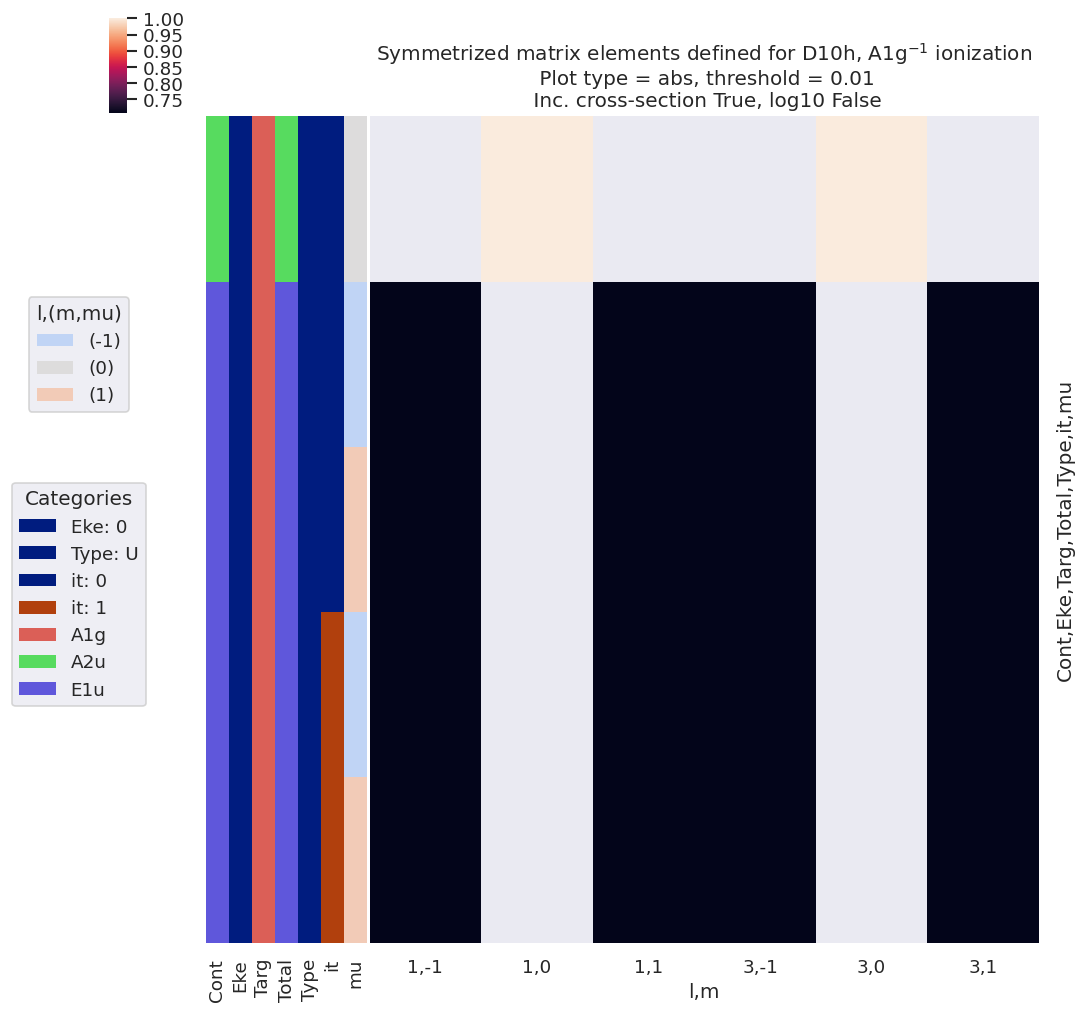

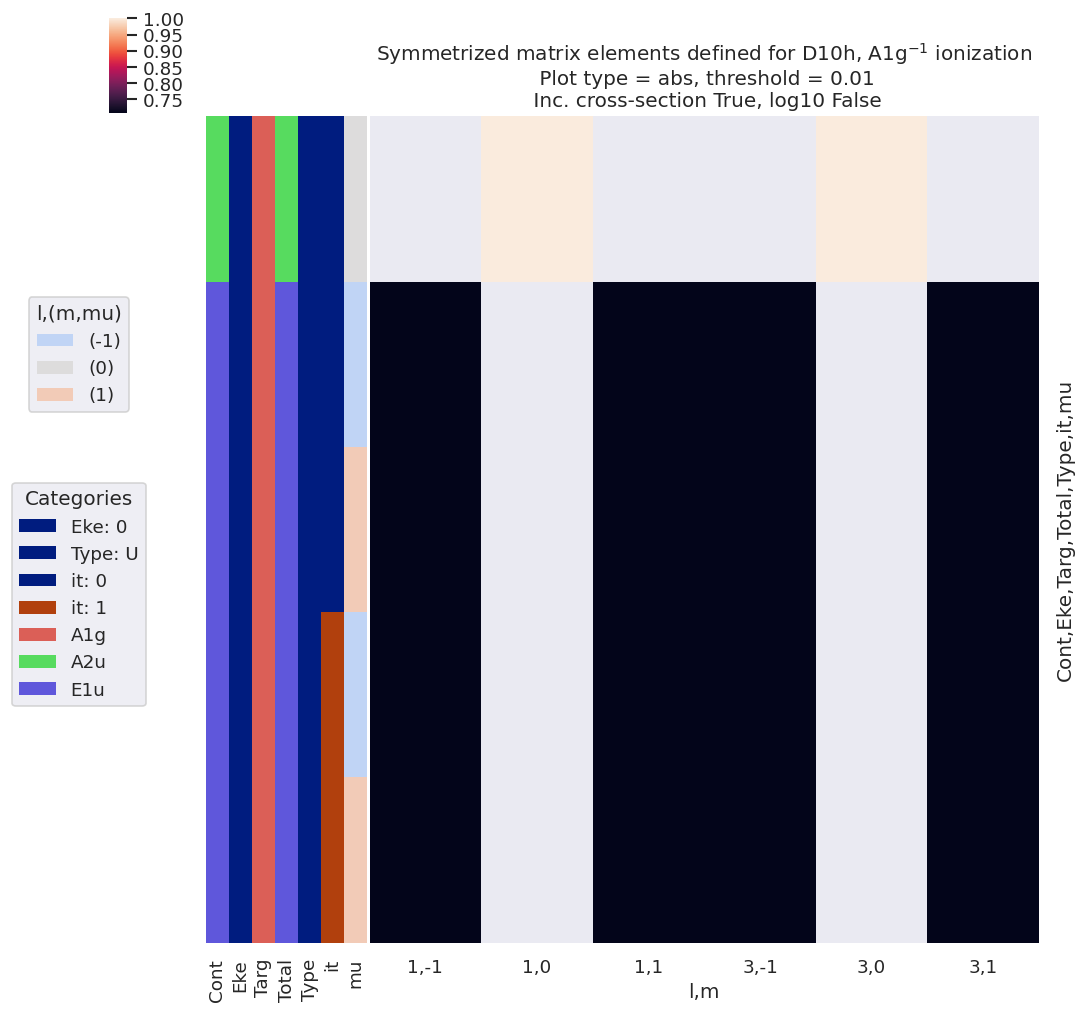

In [7]:
# Plot values
%matplotlib inline
titleString=f'Symmetrized matrix elements defined for {sym}, {sNeutral}$^{{-1}}$ ionization'

*_, gFig =  ep.lmPlot(symObjA1g.coeffs['symAllowed']['XR']['b (comp)'], 
                      titleString=titleString, xDim={'LM':['l','m']}, sumDims='h',
                      labelCols = [1,1])

# Glue figure for later
glue("matEremapD10hA1g", gFig.fig)

```{glue:figure} matEremapD10hA1g
---
name: "fig-matEremapD10hA1g"
---
Dipole-allowed continuum matrix elements for $D_{10h}$, $A_{1g}$ ionization, arranged by $(l,m)$.
```

(sec:basis-sets:remapping-to-fittingParams)=
#### Mapping to fitting parameters (and reduction)

Finally, the basis set of matrix elements can be set to a set of fitting parameters. In this case, as per Eq. {eq}`eqn:I-zeta-mag-phase`, the parameters are mapped to magnitude-phase form; additionally, the fitting routine allows for the definition of relationships between the parameters. This provides a way to reduce the effective size of the basis set to only the unique values, with other terms defined purely by their symmetry relations. Consequently, degenerate cases, as detailed above, as well as cases with defined phase relations, can be efficiently reduced to a smaller basis set for fitting.

For quick setup, there is an automated routine to set relations if applicable. The automated routine currently checks for the following relationships: identity (equal complex values), magnitude and phase equality, complex rotations by $\pm\pi$, where matrix elements are grouped by symmetry (specifically `Cont`) and `l` prior to pair-wise testing. For more control, additional functions can be passed. Alternatively, the automatic setting can be skipped and/or relationships redefined or set manually. This provides a way to test if the symmetry-definitions are manifest in experimental data, rather than imposing them during fitting, or to explore other possible correlations between fitted parameters. Note, however, that in some cases the number of unique parameters in an unsymmetrized case may be large, so care should also be taken to ensure that fit results are meaningful in such cases (e.g. by employing a sufficiently large dataset, and testing for reproducibility).

In [8]:
# Default matrix element relationship tests are set by symCheckDefns
from pemtk.fit._sym import symCheckDefns

symCheckDefns()

{'i': {'name': 'identity',
  'lam': <function pemtk.fit._sym.symCheckDefns.<locals>.<lambda>(x)>,
  'transform': False,
  'constraint': 'x'},
 'abs': {'name': 'abs',
  'lam': <function pemtk.fit._sym.symCheckDefns.<locals>.<lambda>(x)>,
  'transform': True,
  'constraint': 'm_x'},
 'phase': {'name': 'phase',
  'lam': <function pemtk.fit._sym.symCheckDefns.<locals>.<lambda>(x)>,
  'transform': True,
  'constraint': 'p_x'},
 'crot_p': {'name': 'Complex rotation +pi/2',
  'lam': <function pemtk.fit._sym.symCheckDefns.<locals>.<lambda>(x)>,
  'transform': False,
  'constraint': 'arctan2(sin(p_x+pi/2), cos(p_x+pi/2))'},
 'crot_m': {'name': 'Complex rotation -pi/2',
  'lam': <function pemtk.fit._sym.symCheckDefns.<locals>.<lambda>(x)>,
  'transform': False,
  'constraint': 'arctan2(sin(p_x-pi/2), cos(p_x-pi/2))'}}

**Automated assignment from defined matrix elements**

In [9]:
from pemtk.fit.fitClass import pemtkFit

# Example using data class (setup in init script)
data = pemtkFit()

# Set to new key in data class
dataKey = sym
data.data[dataKey] = {}

# Assign allowed matrix elements to fit object
dataType = 'matE'
# General case - just use complex coeffs directly
# data.data[dataKey][dataType] = symObj.coeffs[dataType]['b (comp)']

# Specific case - e.g. sum over 'h'
data.data[dataKey][dataType] = symObjA1g.coeffs['symAllowed']['XR']['b (comp)'].sum('h')

# Propagate attrs
data.data[dataKey][dataType].attrs = symObjA1g.coeffs['symAllowed']['XR'].attrs

In [10]:
# Update selection with options
# E.g. Matrix element sub-selection
# data.selOpts['matE'] = {'thres': 0.01, 'inds': {'Type':'U','Cont':'A1'}}
data.selOpts['matE'] = {'thres': 0.01, 'inds': {'Type':'U'}}
data.setSubset(dataKey = sym, dataType = 'matE')  #, resetSelectors=True)  # Subselect from 'orb5' dataset, matrix elements

# And for the polarisation geometries...
# data.selOpts['pol'] = {'inds': {'Labels': 'z'}}
# data.setSubset(dataKey = 'pol', dataType = 'pol')

Subselected from dataset 'D10h', dataType 'matE': 72 from 540 points (13.33%)


In [11]:
# Set matrix elements to fitting parameters
# Running for the default case will attempt to automatically set the relations between 
# matrix elements according to symmetry.
data.setMatEFit()

Set 18 complex matrix elements to 36 fitting params, see self.params for details.
Auto-setting parameters.


name,value,initial value,min,max,vary,expression
m_A2u_0_A1g_A2u_1_0_0_0,1.00000000,1.0,1.0000e-04,5.00000000,True,
m_A2u_0_A1g_A2u_3_0_0_0,1.00000000,1.0,1.0000e-04,5.00000000,True,
m_E1u_0_A1g_E1u_1_n1_n1_0,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True,
m_E1u_0_A1g_E1u_1_n1_n1_1,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True,
m_E1u_0_A1g_E1u_1_n1_1_0,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,False,m_E1u_0_A1g_E1u_1_n1_n1_0
m_E1u_0_A1g_E1u_1_n1_1_1,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,False,m_E1u_0_A1g_E1u_1_n1_n1_0
m_E1u_0_A1g_E1u_1_1_n1_0,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,False,m_E1u_0_A1g_E1u_1_n1_n1_0
m_E1u_0_A1g_E1u_1_1_n1_1,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,False,m_E1u_0_A1g_E1u_1_n1_n1_0
m_E1u_0_A1g_E1u_1_1_1_0,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,False,m_E1u_0_A1g_E1u_1_n1_n1_0
m_E1u_0_A1g_E1u_1_1_1_1,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,False,m_E1u_0_A1g_E1u_1_n1_n1_0


In [12]:
# Glue table for later
# Need wrapper here otherwise get plain text in current HTML builds, and print(data.params) in PDF version (no data.params._repr_latex_())
glue("fittingParamsD10hA1g", params_to_dataframe(data.params))

# display(data.params)

,name,value,stderr,vary,expr,init_value,min,max,brute_step,correl
0,m_A2u_0_A1g_A2u_1_0_0_0,1.000,None,True,None,1.000,1.000e-04,5.000,None,None
1,m_A2u_0_A1g_A2u_3_0_0_0,1.000,None,True,None,1.000,1.000e-04,5.000,None,None
2,m_E1u_0_A1g_E1u_1_n1_n1_0,0.707,None,True,None,0.707,1.000e-04,5.000,None,None
3,m_E1u_0_A1g_E1u_1_n1_n1_1,0.707,None,True,None,0.707,1.000e-04,5.000,None,None
4,m_E1u_0_A1g_E1u_1_n1_1_0,0.707,None,False,m_E1u_0_A1g_E1u_1_n1_n1_0,0.707,1.000e-04,5.000,None,None
5,m_E1u_0_A1g_E1u_1_n1_1_1,0.707,None,False,m_E1u_0_A1g_E1u_1_n1_n1_0,0.707,1.000e-04,5.000,None,None
6,m_E1u_0_A1g_E1u_1_1_n1_0,0.707,None,False,m_E1u_0_A1g_E1u_1_n1_n1_0,0.707,1.000e-04,5.000,None,None
7,m_E1u_0_A1g_E1u_1_1_n1_1,0.707,None,False,m_E1u_0_A1g_E1u_1_n1_n1_0,0.707,1.000e-04,5.000,None,None
8,m_E1u_0_A1g_E1u_1_1_1_0,0.707,None,False,m_E1u_0_A1g_E1u_1_n1_n1_0,0.707,1.000e-04,5.000,None,None
9,m_E1u_0_A1g_E1u_1_1_1_1,0.707,None,False,m_E1u_0_A1g_E1u_1_n1_n1_0,0.707,1.000e-04,5.000,None,None


In [13]:
# DATA RETURN DEBUG
# dir(data.params)

# data.params.pretty_repr()  # Print plain text, no return
# pdDF = pd.DataFrame(data.params.pretty_print())
# pdDF

# JSON repr
# data.params.dumps()
# pd.read_json(data.params.dumps())

# HTML repr
# data.params._repr_html_()

# # From https://github.com/lmfit/lmfit-py/discussions/827#discussioncomment-4219101
# def params_to_dataframe(params):
#     "convert parametes to a dataframe"
#     par_attrs = ('name', 'value', 'stderr', 'vary', 'expr', 'init_value',
#                  'min', 'max', 'brute_step', 'correl')
#     dat = {attr: [] for attr  in par_attrs}
#     for par in params.values():
#         for attr in par_attrs:
#             dat[attr].append(getattr(par, attr, None))
#     return pd.DataFrame(dat, columns=par_attrs)

# params_to_dataframe(data.params)

In [14]:
# Glue table for later
# glue("fittingParamsD10hA1g", data.params)   # Shows plain text in HTML output, data dump in PDF render.

# May want pretty_print?
# data.params.pretty_print(precision=3)

# # Need wrapper here otherwise get plain text in current HTML builds, and print(data.params) in PDF version (no data.params._repr_latex_())
# glue("fittingParamsD10hA1g", display(data.params._repr_html_()))

```{glue:figure} fittingParamsD10hA1g
---
name: "fig-fittingParamsD10hA1g"
---
Fitting parameters as assigned for $D_{10h}$, $A_{1g}$ ionization. Note the `vary` column, which defines the symmetry-unique values for fitting, whilst the `expression` column indicates the relationships of the non-unique values to the floated parameters.
```

**Modifying fitting basis parameters**

A brief illustration of defining constraints is given below, for more details see the {{ PEMtk_docs }}, particularly the [basic fitting guide](https://pemtk.readthedocs.io/en/latest/fitting/PEMtk_fitting_basic_demo_030621-full_010922.html#Setting-parameter-relations/constraints). For more details on the base lmfit parameters class that is used here, see {{ lmfit }}, particularly the documentation on [parameters](https://lmfit.github.io/lmfit-py/parameters.html) and [constraints](https://lmfit.github.io/lmfit-py/constraints.html).

````{margin}
```{note}

Full tabulations of the parameters available in HTML or notebook formats only.

```
````

In [15]:
# Set parameters with NO constraints set (except a reference phase)
data.setMatEFit(paramsCons = None)

Set 18 complex matrix elements to 36 fitting params, see self.params for details.


name,value,initial value,min,max,vary
m_A2u_0_A1g_A2u_1_0_0_0,1.00000000,1.0,1.0000e-04,5.00000000,True
m_A2u_0_A1g_A2u_3_0_0_0,1.00000000,1.0,1.0000e-04,5.00000000,True
m_E1u_0_A1g_E1u_1_n1_n1_0,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True
m_E1u_0_A1g_E1u_1_n1_n1_1,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True
m_E1u_0_A1g_E1u_1_n1_1_0,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True
m_E1u_0_A1g_E1u_1_n1_1_1,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True
m_E1u_0_A1g_E1u_1_1_n1_0,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True
m_E1u_0_A1g_E1u_1_1_n1_1,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True
m_E1u_0_A1g_E1u_1_1_1_0,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True
m_E1u_0_A1g_E1u_1_1_1_1,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True


In [16]:
# To add manual constraints
# Set param constraints as dict
# Any basic mathematical relations can be set here, 
# see https://lmfit.github.io/lmfit-py/constraints.html
paramsCons = {}
paramsCons['m_A2u_0_A1g_A2u_1_0_0_0'] = '5*m_A2u_0_A1g_A2u_3_0_0_0'

# Missing settings will generate an error message
paramsCons['test'] = 'p_PU_SG_PU_3_1_n1_1'

# Init parameters with specified constraints
data.setMatEFit(paramsCons = paramsCons)

Set 18 complex matrix elements to 36 fitting params, see self.params for details.
*** Warning, parameter test not present, skipping constraint test = p_PU_SG_PU_3_1_n1_1


name,value,initial value,min,max,vary,expression
m_A2u_0_A1g_A2u_1_0_0_0,5.00000000,1.0,1.0000e-04,5.00000000,False,5*m_A2u_0_A1g_A2u_3_0_0_0
m_A2u_0_A1g_A2u_3_0_0_0,1.00000000,1.0,1.0000e-04,5.00000000,True,
m_E1u_0_A1g_E1u_1_n1_n1_0,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True,
m_E1u_0_A1g_E1u_1_n1_n1_1,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True,
m_E1u_0_A1g_E1u_1_n1_1_0,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True,
m_E1u_0_A1g_E1u_1_n1_1_1,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True,
m_E1u_0_A1g_E1u_1_1_n1_0,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True,
m_E1u_0_A1g_E1u_1_1_n1_1,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True,
m_E1u_0_A1g_E1u_1_1_1_0,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True,
m_E1u_0_A1g_E1u_1_1_1_1,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True,


In [17]:
# Individual parameters can be addressed by name, 

data.params['m_E1u_0_A1g_E1u_1_n1_n1_0']

<Parameter 'm_E1u_0_A1g_E1u_1_n1_n1_0', value=0.7071067811865475, bounds=[0.0001:5.0]>

In [18]:
# Properties can be modified directly... 
data.params['m_A2u_0_A1g_A2u_3_0_0_0'].value = 1.777

# ...or by using lmfit's `.set()` method.
data.params['m_E1u_0_A1g_E1u_1_n1_n1_0'].set(value = 1.36)
data.params['m_E1u_0_A1g_E1u_1_n1_n1_0'].set(vary = False)
data.params['m_E1u_0_A1g_E1u_1_n1_n1_0']

<Parameter 'm_E1u_0_A1g_E1u_1_n1_n1_0', value=1.36 (fixed), bounds=[0.0001:5.0]>

In [19]:
# The full set can always be checked via self.params
data.params

name,value,initial value,min,max,vary,expression
m_A2u_0_A1g_A2u_1_0_0_0,5.00000000,1.0,1.0000e-04,5.00000000,False,5*m_A2u_0_A1g_A2u_3_0_0_0
m_A2u_0_A1g_A2u_3_0_0_0,1.77700000,1.0,1.0000e-04,5.00000000,True,
m_E1u_0_A1g_E1u_1_n1_n1_0,1.36000000,1.36,1.0000e-04,5.00000000,False,
m_E1u_0_A1g_E1u_1_n1_n1_1,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True,
m_E1u_0_A1g_E1u_1_n1_1_0,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True,
m_E1u_0_A1g_E1u_1_n1_1_1,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True,
m_E1u_0_A1g_E1u_1_1_n1_0,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True,
m_E1u_0_A1g_E1u_1_1_n1_1,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True,
m_E1u_0_A1g_E1u_1_1_1_0,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True,
m_E1u_0_A1g_E1u_1_1_1_1,0.70710678,0.7071067811865475,1.0000e-04,5.00000000,True,


In [20]:
# The full mapping of parameter names and indexes is given in self.lmmu
data.lmmu

{'Index': MultiIndex([('A2u', 0, 'A1g', 'A2u', 1,  0,  0, 0),
             ('A2u', 0, 'A1g', 'A2u', 3,  0,  0, 0),
             ('E1u', 0, 'A1g', 'E1u', 1, -1, -1, 0),
             ('E1u', 0, 'A1g', 'E1u', 1, -1, -1, 1),
             ('E1u', 0, 'A1g', 'E1u', 1, -1,  1, 0),
             ('E1u', 0, 'A1g', 'E1u', 1, -1,  1, 1),
             ('E1u', 0, 'A1g', 'E1u', 1,  1, -1, 0),
             ('E1u', 0, 'A1g', 'E1u', 1,  1, -1, 1),
             ('E1u', 0, 'A1g', 'E1u', 1,  1,  1, 0),
             ('E1u', 0, 'A1g', 'E1u', 1,  1,  1, 1),
             ('E1u', 0, 'A1g', 'E1u', 3, -1, -1, 0),
             ('E1u', 0, 'A1g', 'E1u', 3, -1, -1, 1),
             ('E1u', 0, 'A1g', 'E1u', 3, -1,  1, 0),
             ('E1u', 0, 'A1g', 'E1u', 3, -1,  1, 1),
             ('E1u', 0, 'A1g', 'E1u', 3,  1, -1, 0),
             ('E1u', 0, 'A1g', 'E1u', 3,  1, -1, 1),
             ('E1u', 0, 'A1g', 'E1u', 3,  1,  1, 0),
             ('E1u', 0, 'A1g', 'E1u', 3,  1,  1, 1)],
            names=['Cont', 'Eke', 'T

In [21]:
# TODO - improve/consolidate tabulation!

# Tabulate the matrix elements
# Not showing as nice table for singleton case - pd.series vs. dataframe?
data.matEtoPD(keys = 'subset', xDim = 'Sym', drop=False, printTable=False)

* Subset data set to self.data['subset']['matESub']


In [22]:
# data.data['subset']['matESub'].pd

In [23]:
# data.data['subset']['matE']

**Manually setting fitting basis**

To modify and/or set a basis set manually, the same functions can be used with different inputs and/or options. A few examples are given here, see the {{ PEMtk_docs }} for more information.

In [25]:
# Manual configuration of matrix elements
# Example using data class
dataManual = pemtkFit()

# Manual setting for matrix elements
# See API docs at https://epsproc.readthedocs.io/en/dev/modules/epsproc.util.setMatE.html
EPoints = 10
dataManual.setMatE(data = [[0,0, *np.ones(EPoints)], [2,0, *np.linspace(0,1,EPoints)], [4,0, *np.linspace(0,0.5,EPoints)]], 
             dataNames=['l','m'])

# Matrix elements are set to Xarray and Pandas formats, under the 'matE' key
dataManual.data['matE']['matE'].pd

,Eke,0,1,2,3,4,5,6,7,8,9
l,m,,,,,,,,,,
0,0,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.0
2,0,0.0,0.111,0.222,0.333,0.444,0.556,0.667,0.778,0.889,1.0
4,0,0.0,0.056,0.111,0.167,0.222,0.278,0.333,0.389,0.444,0.5


In [28]:
# To use manual settings for fitting, set `conformDims=True` to ensure ePSproc labelling
dataManual.setMatE(data = [[0,0, *np.ones(EPoints)], [2,0, *np.linspace(0,1,EPoints)], [4,0, *np.linspace(0,0.5,EPoints)]], 
             dataNames=['l','m'], conformDims=True)

# Then use as normal
dataManual.selOpts['matE'] = {'thres': 0.01, 'inds': {'Type':'U', 'Eke':1} }
dataManual.setSubset(dataKey = 'matE', dataType = 'matE')
dataManual.data[data.subKey]['matE']['it'] = [1]   # In some cases NaN values may need to be set for setMatEFit.
dataManual.setMatEFit()

*** Mapping coeffs to ePSproc dataType = matE
Remapped dims: {}
Added dim Cont
Added dim Targ
Added dim Total
Added dim mu
Added dim it
Added dim Type
Subselected from dataset 'matE', dataType 'matE': 3 from 30 points (10.00%)
Set 3 complex matrix elements to 6 fitting params, see self.params for details.
Auto-setting parameters.


name,value,initial value,min,max,vary
m_U_U_U_0_0_nan_1,1.00000000,1.0,1.0000e-04,5.00000000,True
m_U_U_U_2_0_nan_1,0.11111111,0.1111111111111111,1.0000e-04,5.00000000,True
m_U_U_U_4_0_nan_1,0.05555556,0.05555555555555555,1.0000e-04,5.00000000,True
p_U_U_U_0_0_nan_1,0.00000000,0.0,-3.14159265,3.14159265,False
p_U_U_U_2_0_nan_1,0.00000000,0.0,-3.14159265,3.14159265,True
p_U_U_U_4_0_nan_1,0.00000000,0.0,-3.14159265,3.14159265,True


(sec:basis-sets:comparison-with-abinitio)=
## Comparison with symmetry-defined and computational matrix elements

For comparison of a given symmetry-defined basis set with sample _ab initio_ calculations using {{ ePS_full }} calculations, results can be computed locally or pulled from the web. Some sample/test datasets can be found as part of the [ePSproc repo](https://github.com/phockett/ePSproc/tree/master/data), which includes the case study examples herein. Further {{ ePS_full }} datasets are available from the {{ ePSdata_repo }}, and [data can be pulled using the python ePSdata interface](https://epsproc.readthedocs.io/en/dev/demos/ePSdata_download_demo_300720.html).

In the following, the test case above for $N_2~3\sigma_g^{-1}$ ionization is illustrated. Note that this comparison shows the results of a full _ab initio_ computation of the matrix elements (Eq. {eq}`eq:matE-dipole`) versus the symmetry-allowed harmonics and associated $b_{hl\lambda}^{\Gamma\mu}$ parameters (Eq. {eq}`eq:symHarm-defn`). In the former case, the $b_{hl\lambda}^{\Gamma\mu}$ are incorporated into the numerical results, but the full angular momentum selection rules and dipole integrals are also included; in the latter case the $b_{hl\lambda}^{\Gamma\mu}$ parameters serve to define the allowed matrix elements, and symmetry relations (e.g. phase, rotations and degeneracy), but _do not_ include any other effects. Hence the comparison here indicates whether the symmetry-defined basis set is sufficient for a matrix element reconstruction, but it may contain terms which are zero in practice, or otherwise drop out from the complete photoionization treatment. Some conventions may also be different.

In [40]:
# Pull N2 data from ePSproc Github repo
dataName = 'n2Data'

# Set data dir
dataPath = Path(Path.cwd(), dataName)

# For pulling data from Github, a utility function is available
# This requires the repo subpath, and optionally branch
fDictMatE, fAllMatE = ep.util.io.getFilesFromGithub(subpath='data/photoionization/n2_multiorb', 
                                                    dataName=dataName, ref='dev')  # Optional settings

Querying URL: https://api.github.com/repos/phockett/epsproc/contents/data/photoionization/n2_multiorb?ref=dev
Local file /home/jovyan/QM3/doc-source/part2/n2Data/n2_1pu_0.1-50.1eV_A2.inp.out already exists
Local file /home/jovyan/QM3/doc-source/part2/n2Data/n2_3sg_0.1-50.1eV_A2.inp.out already exists


In [34]:
# Import data with PEMtk class
# For more details on ePSproc usage see 
# https://epsproc.readthedocs.io/en/dev/demos/ePSproc_class_demo_161020.html

# Instantiate class object.
# Minimally this needs just the dataPath, if verbose = 1 is set 
# then some useful output will also be printed.
data = pemtkFit(fileBase=dataPath, verbose = 1)

# ScanFiles() - this will look for data files on the path provided, and read from them.
data.scanFiles()


*** Job subset details
Key: subset
No 'job' info set for self.data[subset].

*** Job orb6 details
Key: orb6
Dir /home/jovyan/QM3/doc-source/part2/n2Data, 1 file(s).
{   'batch': 'ePS n2, batch n2_1pu_0.1-50.1eV, orbital A2',
    'event': ' N2 A-state (1piu-1)',
    'orbE': -17.09691397835426,
    'orbLabel': '1piu-1'}

*** Job orb5 details
Key: orb5
Dir /home/jovyan/QM3/doc-source/part2/n2Data, 1 file(s).
{   'batch': 'ePS n2, batch n2_3sg_0.1-50.1eV, orbital A2',
    'event': ' N2 X-state (3sg-1)',
    'orbE': -17.34181645456815,
    'orbLabel': '3sg-1'}


% NOTE hide-input set for cells below, OK in HTML, but omits cell AND output in PDF builds? May need to glue output too, or might be HTML display issue?

In [35]:
# Tabulate some demo matrix elements
singleEdata = ep.matEleSelector(data.data['orb5']['matE'], inds={'Eke':slice(0.001,1,1),'Type':'L'}, thres=1e-3)

matEPD, _ = ep.multiDimXrToPD(singleEdata, colDims = 'Cont', thres=1e-4) 


# Compare results
# For side-by-side tables, code adapted from https://stackoverflow.com/a/50899244
from IPython.display import display_html 

# Check specific symmetry sets
syms = ['A2u','SU']  # Set for [manual, ePS] symmetry label selections
df1 = symObjA1g.coeffs['symAllowed']['PD'].droplevel('h').droplevel('Type').sort_index()[syms[0]].dropna().to_frame()
df2 = matEPD.sort_index().sort_index(level='Total', ascending=[False]).sort_index(axis=1, ascending=False)[syms[1]].dropna().to_frame()

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('<b>Symmetry basis</b>')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('<b>ePS basis</b>')

# display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

In [36]:
# Format and display results from previous cell (hidden in some formats)
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

Symmetry basis 
 
 
   
   
   
   
   
   
   
 A2u 
 
 
 Eke 
 Targ 
 Total 
 it 
 l 
 m 
 mu 
   
 
 
 
 
 0 
 A1g 
 A2u 
 0 
 1 
 0 
 0 
 1.000000+0.000000j 
 
 
 3 
 0 
 0 
 1.000000+0.000000j 
 
 
 

 
 ePS basis 
 
 
   
   
   
   
   
   
   
 SU 
 
 
 Eke 
 Targ 
 Total 
 it 
 l 
 m 
 mu 
   
 
 
 
 
 0.100000 
 SG 
 SU 
 1 
 1 
 0 
 0 
 2.736321-0.092697j 
 
 
 3 
 0 
 0 
 -0.171588-0.795292j 
 
 
 5 
 0 
 0 
 -0.000034+0.001499j

Here the basis sets are identical, aside from the difference in $l_{max}$.

In [37]:
# Check specific sets
syms = ['E1u','PU']   # Set for [manual, ePS] symmetry label selections
df1 = symObjA1g.coeffs['symAllowed']['PD'].droplevel('h').droplevel('Type').sort_index()[syms[0]].dropna().to_frame()
df2 = matEPD.sort_index().sort_index(level='Total', ascending=[False]).sort_index(axis=1, ascending=False)[syms[1]].dropna().to_frame()

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('<b>Symmetry basis</b>')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('<b>ePS basis</b>')

In [38]:
# Format and display results from previous cell (hidden in some formats)
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

Symmetry basis 
 
 
   
   
   
   
   
   
   
 E1u 
 
 
 Eke 
 Targ 
 Total 
 it 
 l 
 m 
 mu 
   
 
 
 
 
 0 
 A1g 
 E1u 
 0 
 1 
 -1 
 -1 
 0.707107+0.000000j 
 
 
 1 
 0.707107+0.000000j 
 
 
 1 
 -1 
 -0.707107-0.000000j 
 
 
 1 
 -0.707107-0.000000j 
 
 
 3 
 -1 
 -1 
 0.707107+0.000000j 
 
 
 1 
 0.707107+0.000000j 
 
 
 1 
 -1 
 -0.707107-0.000000j 
 
 
 1 
 -0.707107-0.000000j 
 
 
 1 
 1 
 -1 
 -1 
 -0.707107+0.000000j 
 
 
 1 
 -0.707107+0.000000j 
 
 
 1 
 -1 
 -0.707107-0.000000j 
 
 
 1 
 -0.707107-0.000000j 
 
 
 3 
 -1 
 -1 
 -0.707107+0.000000j 
 
 
 1 
 -0.707107+0.000000j 
 
 
 1 
 -1 
 -0.707107-0.000000j 
 
 
 1 
 -0.707107-0.000000j 
 
 
 

 
 ePS basis 
 
 
   
   
   
   
   
   
   
 PU 
 
 
 Eke 
 Targ 
 Total 
 it 
 l 
 m 
 mu 
   
 
 
 
 
 0.100000 
 SG 
 PU 
 1 
 1 
 -1 
 1 
 -1.775708+0.634748j 
 
 
 1 
 -1 
 -1.775708+0.634748j 
 
 
 3 
 -1 
 1 
 0.075363+0.602171j 
 
 
 1 
 -1 
 0.075363+0.602171j

Here the symmetry-defined basis has two degenerate continuua, `it=0,1`, with a phase rotation applied between them. For `it=0` the $\pm m$ terms are anti-phase, whilst for `it=1` they are in-phase (all negative). For the ePS basis, only the anti-phase component is present, and is further reduced to terms with $m$ and $mu$ of opposite sign. These differences are due to additional restrictions imposed by angular momentum selection rules, which are not included in the symmetry-defined case.

In general, the current mappings should be suitable for simulation and reconstruction, but care should be taken to:

1. Confirm symmetry and angular momentum relations for a given case.
1. Apply additional transformations if comparison with computational results is required.
1. Add degeneracy factors if required (otherwise will be subsumed into matrix element values).

% TODO: address some of these points in this notebook.